### Active learning
Select examples from VLSP training set for manual label correction and active learning

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
fname = "/home/local/VANDERBILT/litz/data/imagevu/nifti/active_learning/dataset_07/5folds.csv"
with open(fname, "r") as f:
    for line in f:
        print(len(line.split(",")))

13
13
13
13
14


In [3]:
metrics_path= "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0416unet512peter/test.csv"
metrics_df = pd.read_csv(metrics_path)
metrics_df = metrics_df.rename(columns={"Unnamed: 0":"id"})
metrics_df

,id,0,1,2,3,4,input_path
0,0,0.944150,0.951356,0.935595,0.859424,0.958361,/home/local/VANDERBILT/litz/data/imagevu/nifti...
1,1,0.937508,0.953855,0.942496,0.907860,0.970856,/home/local/VANDERBILT/litz/data/imagevu/nifti...
2,2,0.905494,0.945703,0.927449,0.869351,0.968883,/home/local/VANDERBILT/litz/data/imagevu/nifti...
3,3,0.870890,0.798166,0.842407,0.672921,0.860644,/home/local/VANDERBILT/litz/data/imagevu/nifti...
4,4,0.924979,0.962519,0.955311,0.787365,0.963560,/home/local/VANDERBILT/litz/data/imagevu/nifti...
...,...,...,...,...,...,...,...
1204,1204,0.955315,0.943372,0.931253,0.850648,0.960003,/home/local/VANDERBILT/litz/data/imagevu/nifti...
1205,1205,0.941730,0.954843,0.956388,0.856356,0.976690,/home/local/VANDERBILT/litz/data/imagevu/nifti...
1206,1206,0.923465,0.899431,0.913627,0.717078,0.916732,/home/local/VANDERBILT/litz/data/imagevu/nifti...
1207,1207,0.952725,0.936451,0.950237,0.915226,0.935839,/home/local/VANDERBILT/litz/data/imagevu/nifti...


In [4]:
def lobe_map(x):
    if x=='0': return 'LUL'
    if x=='1': return 'LLL'
    if x=='2': return 'RUL'
    if x=='3': return 'RML'
    if x=='4': return 'RLL'
metrics_long = pd.melt(metrics_df, id_vars=['id', 'input_path'],value_vars=['0', '1', '2', '3', '4'])
metrics_long = metrics_long.rename(columns={'variable':'Lobe', 'value': 'Dice score'})
metrics_long['Lobe']=metrics_long['Lobe'].apply(lobe_map)
metrics_long

,id,input_path,Lobe,Dice score
0,0,/home/local/VANDERBILT/litz/data/imagevu/nifti...,LUL,0.944150
1,1,/home/local/VANDERBILT/litz/data/imagevu/nifti...,LUL,0.937508
2,2,/home/local/VANDERBILT/litz/data/imagevu/nifti...,LUL,0.905494
3,3,/home/local/VANDERBILT/litz/data/imagevu/nifti...,LUL,0.870890
4,4,/home/local/VANDERBILT/litz/data/imagevu/nifti...,LUL,0.924979
...,...,...,...,...
6040,1204,/home/local/VANDERBILT/litz/data/imagevu/nifti...,RLL,0.960003
6041,1205,/home/local/VANDERBILT/litz/data/imagevu/nifti...,RLL,0.976690
6042,1206,/home/local/VANDERBILT/litz/data/imagevu/nifti...,RLL,0.916732
6043,1207,/home/local/VANDERBILT/litz/data/imagevu/nifti...,RLL,0.935839


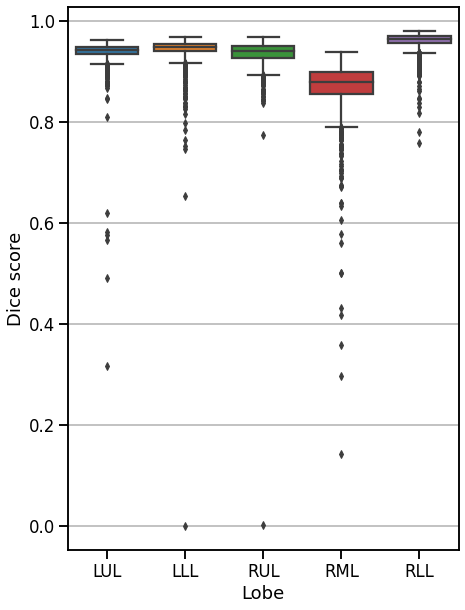

In [5]:
sns.set_context(context="talk")
f, ax = plt.subplots(figsize=(7,10))
sns.boxplot(x="Lobe", y="Dice score", data=metrics_long)
ax.yaxis.grid(True)

In [9]:
candidates = metrics_long[metrics_long['Dice score']>0.96]
print(len(candidates))

979


In [41]:
gb_candidates = candidates.groupby(['id', 'input_path'], as_index=False).max()
print(len(gb_candidates))
# gb_candidates.to_csv('/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/models/0416unet512peter/dice_lt070.csv', index_label=False)

20


In [34]:
gb_candidates['input_path'][0]

'/home/local/VANDERBILT/litz/data/imagevu/nifti/train_preproc/00000005time20140114.nii.gz'